In [37]:
# from meta.ai
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

def ar1_process(phi_hat, mu, sigma_hat, n):
    """
    Generate an AR(1) process.

    Parameters:
    phi (float): Autoregressive coefficient.
    mu (float): Mean of the process.
    sigma (float): Standard deviation of the noise.
    n (int): Number of terms to generate.

    Returns:
    x (numpy array): The generated AR(1) process.
    """
    phi = np.exp(-1/phi_hat)
    sigma = sigma_hat**2 * (1-np.exp(-2/phi_hat))
    
    x = np.zeros(n)
    x[0] = mu + np.random.normal(0, sigma)
    for i in range(1, n):
        x[i] = mu + phi * (x[i-1] - mu) + np.random.normal(0, np.sqrt(sigma))
    return x



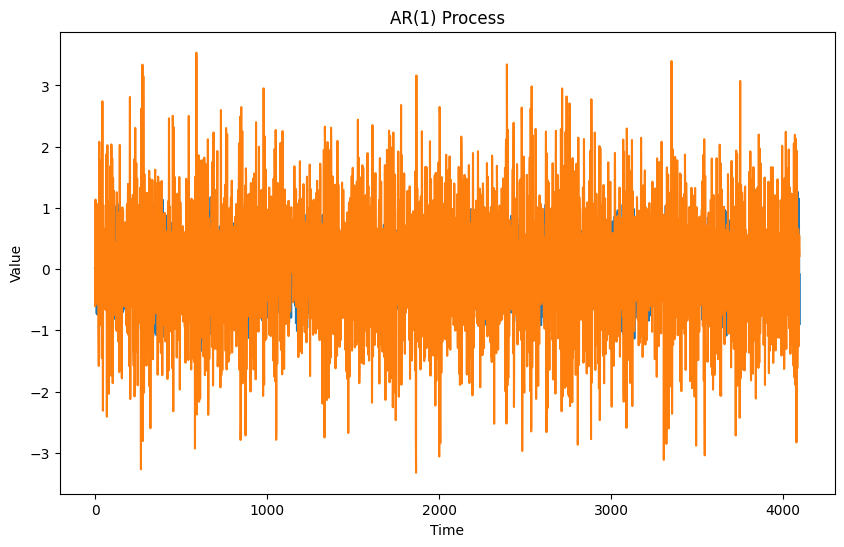

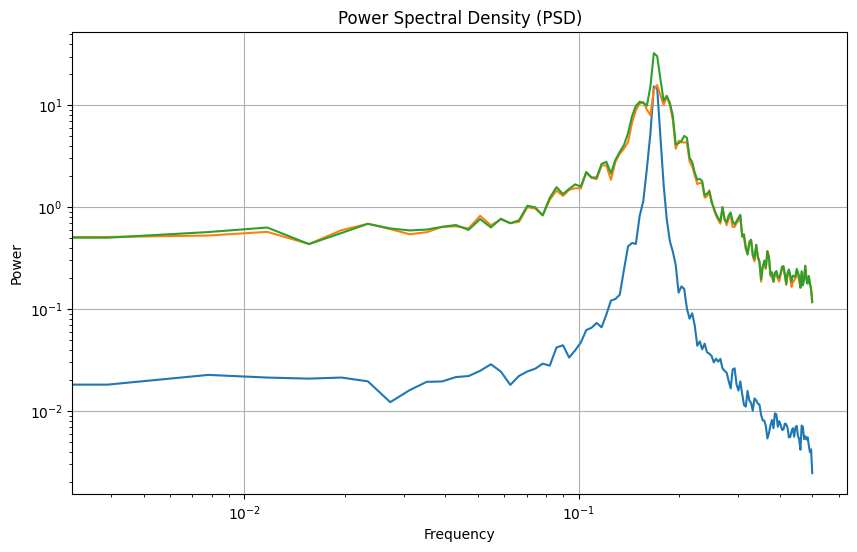

In [41]:
# Example usage
np.random.seed(0)  # For reproducibility
n = 4096  # Number of terms to generate

omega = 200

mu1 = 0  # Mean of the process
mu2 = 0 # Mean of the process

tau_1 = 60 # steps
sigma_1 = 0.5

tau_2 = 7 # steps
sigma_2 = 1.

x1a = ar1_process(tau_1, mu1, sigma_1, n)
x1b = ar1_process(tau_1, mu1, sigma_1, n)

x2a = ar1_process(tau_2, mu2, sigma_2, n)
x2b = ar1_process(tau_2, mu2, sigma_2, n)

t = np.arange(n)
x1 = x1a*np.cos(omega*t) + x1b*np.sin(omega*t)
x2 = x2a*np.cos(omega*t) + x2b*np.sin(omega*t)

x = x1+x2

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(x1)
plt.plot(x2)

plt.title("AR(1) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Plot the power spectral density (PSD)
plt.figure(figsize=(10, 6))
f, Pxx = welch(x1, fs=1.0)
plt.loglog(f, Pxx)

f, Pxx = welch(x2, fs=1.0)
plt.loglog(f, Pxx)

f, Pxx = welch(x, fs=1.0)
plt.loglog(f, Pxx)

plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()